# Script for data cleaning and basic data-set exploration. 
This can form the beginning section of the final script.

In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [5]:
salmonella_orig = pd.read_csv('sedata.csv') #load the data
salmonella_df = salmonella_orig.copy() #Make a copy to modify
salmonella_df.head()

,#Organism group,Strain,Isolate identifiers,Serovar,Isolate,Create date,Location,Isolation source,Isolation type,SNP cluster,Min-same,Min-diff,BioSample,Assembly,AMR genotypes,Computed types
0,Salmonella enterica,SQ0227,"""93-6175B"",""SQ0227"",""SRS426868""",enteritidis,PDT000000002.3,2014-01-04T17:03:07Z,USA: Western Region,Ocean,environmental/other,PDS000032687.2,0.0,NaN,SAMN02147118,NaN,"ant(2'')-Ia=COMPLETE,aph(3')-Ia=COMPLETE,blaTE...","antigen_formula=9:g,m:-,serotype=Enteritidis"
1,Salmonella enterica,SQ0228,"""93-2836A"",""SQ0228"",""SRS426867""",enteritidis,PDT000000003.3,2014-01-04T17:03:07Z,USA: Western Region,Ocean,environmental/other,PDS000032687.2,0.0,NaN,SAMN02147119,NaN,"mdsA=COMPLETE,mdsB=COMPLETE","antigen_formula=9:g,m:-,serotype=Enteritidis"
2,Salmonella enterica,SQ0229,"""93-7741"",""SQ0229"",""SRS426869""",enteritidis,PDT000000004.3,2014-01-04T17:03:07Z,USA: Western Region,Ocean,environmental/other,PDS000065776.23,0.0,25.0,SAMN02147120,NaN,"mdsA=COMPLETE,mdsB=COMPLETE","antigen_formula=9:g,m:-,serotype=Enteritidis"
3,Salmonella enterica,Gen_001782,"""Gen_001782"",""SRS426891""",Heidelberg,PDT000000005.4,2014-01-04T17:03:07Z,USA,food,environmental/other,PDS000150683.10,2.0,2.0,SAMN02147121,GCA_010121905.1,"fosA7=COMPLETE,mdsA=COMPLETE,mdsB=COMPLETE","antigen_formula=4:r:1,2,serotype=Heidelberg"
4,Salmonella enterica,Gen_001783,"""Gen_001783"",""SRS426892""",Heidelberg,PDT000000006.4,2014-01-04T17:03:07Z,USA,food,environmental/other,PDS000150683.10,2.0,17.0,SAMN02147122,GCA_010121865.1,"blaCMY-2=COMPLETE,fosA7=COMPLETE,mdsA=COMPLETE...","antigen_formula=4:r:1,2,serotype=Heidelberg"


In [6]:
# Check number of variables in the original set
unique_counts_orig = salmonella_orig.nunique()
print(unique_counts_orig)

#Organism group             1
Strain                 515229
Isolate identifiers    558565
Serovar                  2471
Isolate                558819
Create date            182136
Location                 1280
Isolation source         8004
Isolation type              2
SNP cluster             25025
Min-same                   80
Min-diff                   99
BioSample              558734
Assembly               468778
AMR genotypes           19095
Computed types           2148
dtype: int64


In [7]:
# Standardise capitalisation to remove duplicates from the serovar and isolation sources columns
salmonella_df['Serovar'] = salmonella_df['Serovar'].str.capitalize()
salmonella_df['Isolation source'] = salmonella_df['Isolation source'].str.capitalize()

In [8]:
# Check number of variables in the cleaned set
unique_counts = salmonella_df.nunique()
print(unique_counts)

#Organism group             1
Strain                 515229
Isolate identifiers    558565
Serovar                  2445
Isolate                558819
Create date            182136
Location                 1280
Isolation source         7437
Isolation type              2
SNP cluster             25025
Min-same                   80
Min-diff                   99
BioSample              558734
Assembly               468778
AMR genotypes           19095
Computed types           2148
dtype: int64


# Isolation Sources
This section explores the 'Isolation Sources' column, which includes a lot of singletons and semantic duplicates.

In [9]:
# Get numbers for each unique value in the isolation sources column
salmonella_df['Isolation source'].value_counts()

Isolation source
Human                                                         71800
Stool                                                         28915
Raw intact chicken                                             9135
Feces                                                          8267
Product-raw-ground, comminuted or otherwise nonintact-pork     6236
                                                              ...  
Intestine (lama pacos)                                            1
Fecal (equus ferus caballus)                                      1
Fecal (gallus gallus domesticus)                                  1
Dried black fungus whole                                          1
Veggie snack                                                      1
Name: count, Length: 7437, dtype: int64

In [10]:
# Look at the high numbers
isolation_sources = salmonella_df['Isolation source'].value_counts()
isolation_sources.head(25)

Isolation source
Human                                                         71800
Stool                                                         28915
Raw intact chicken                                             9135
Feces                                                          8267
Product-raw-ground, comminuted or otherwise nonintact-pork     6236
Comminuted chicken                                             5659
Blood                                                          5579
Food                                                           4456
Ground turkey                                                  4040
Comminuted beef                                                4015
Chicken                                                        3291
Chicken carcass                                                3190
Human, stool                                                   3180
Chicken breast                                                 3049
Chicken - young chicken carcass

In [11]:
# Look at the singletons -- omg it's half the set!
print(isolation_sources[isolation_sources == 1])

Isolation source
Liver pool (gallus gallus domesticus)    1
Soppressata                              1
Red billed gull                          1
Intestine (cavia porcellus)              1
Baby frozen whole cleaned octopus        1
                                        ..
Intestine (lama pacos)                   1
Fecal (equus ferus caballus)             1
Fecal (gallus gallus domesticus)         1
Dried black fungus whole                 1
Veggie snack                             1
Name: count, Length: 3875, dtype: int64


In [12]:
# Then the other half:
print(isolation_sources[isolation_sources > 1])

Isolation source
Human                                                         71800
Stool                                                         28915
Raw intact chicken                                             9135
Feces                                                          8267
Product-raw-ground, comminuted or otherwise nonintact-pork     6236
                                                              ...  
Oral swab                                                         2
Duck bed liner                                                    2
Frozen salted cobia                                               2
Frozen cooked salted duck egg yolk                                2
Bovine meat bone meal                                             2
Name: count, Length: 3562, dtype: int64


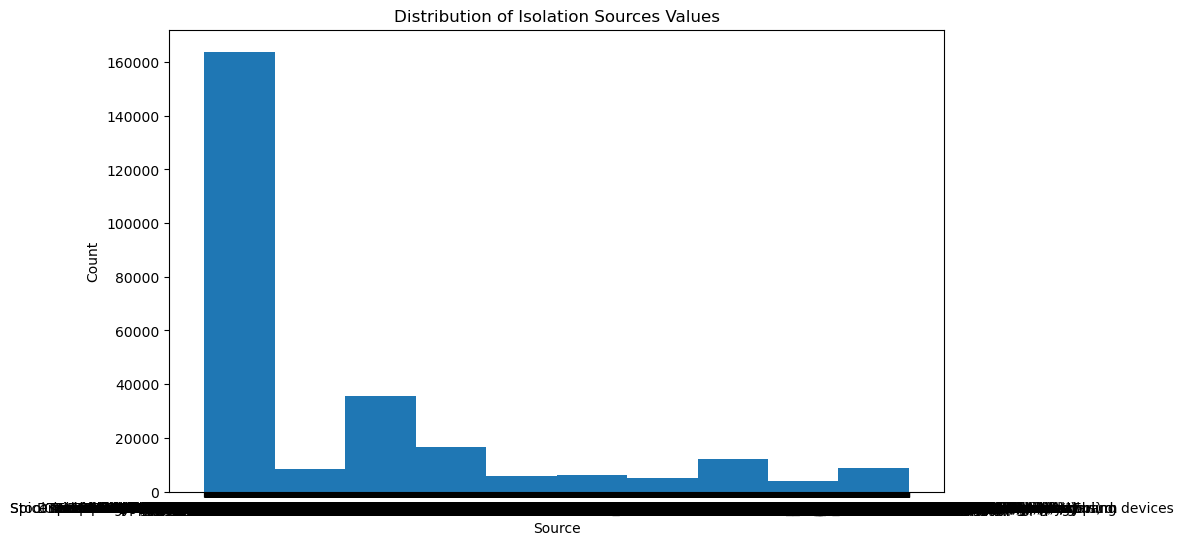

In [13]:
# Histogram to see the distribution of sources
salmonella_df['Isolation source'].hist(bins=10, figsize=(10, 6))
plt.title('Distribution of Isolation Sources Values')
plt.xlabel('Source')
plt.ylabel('Count')
plt.grid(False)  # Optional: removes grid lines
plt.show()


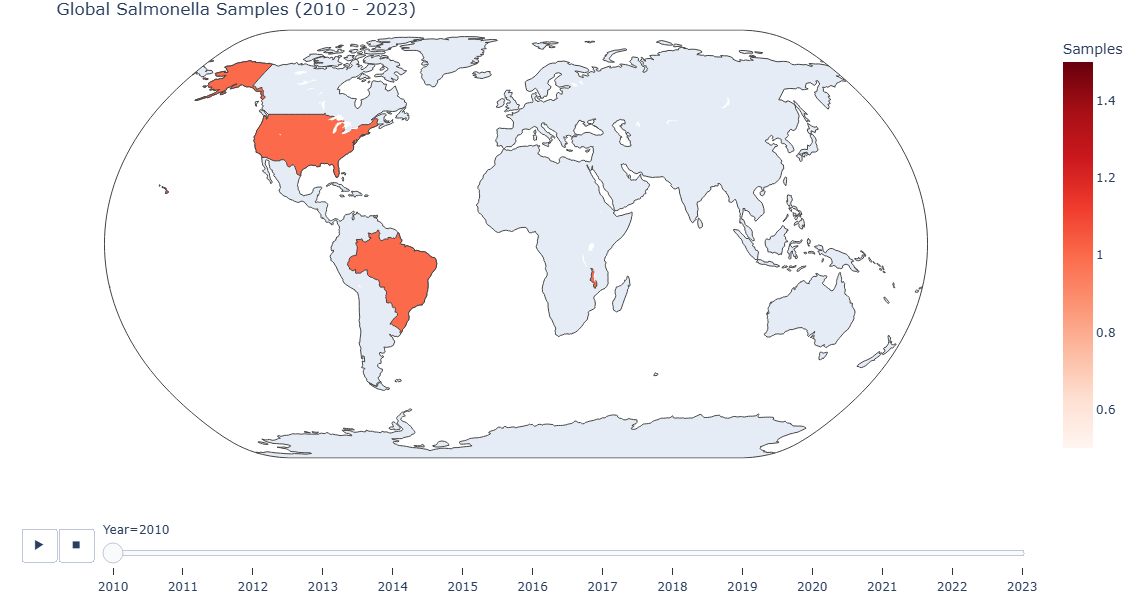

In [15]:
# Global mapping of Salmonella reports over time

import plotly.express as px
import pycountry

valid_country_names = [country.name.strip().lower() for country in pycountry.countries]

def is_country(name):
    if not isinstance(name, str):
        return False
    
    name = name.strip().lower()
    
    if name in valid_country_names:
        return True
    if name in ['usa', 'united states', 'united states of america']:
        return True
    return False

df = salmonella_df.copy()
df.loc[:, 'Country'] = df['Location'].str.split(':').str[0]
df = df[df['Country'].apply(is_country)]
df['Year'] = df['Create date'].str.split('-').str[0]

        
sample_counts = df.groupby(['Country', 'Year']).size().reset_index(name='Samples')
sample_counts = sample_counts.sort_values('Year')

yearly_totals = sample_counts.groupby('Year')['Samples'].sum()

fig = px.choropleth(
    sample_counts,
    locations='Country',      
    locationmode = 'country names',
    color='Samples',             # Salmonella sample counts
    animation_frame = 'Year',
    color_continuous_scale='Reds',  # Choose any color scale (e.g. 'Blues', 'Viridis', 'Plasma')
    projection='natural earth',  # Projection style
    title='Global Salmonella Samples (2010 - 2023)',
)

fig.update_layout(
    width=1000,   
    height=600,   
    margin={"r":0,"t":30,"l":0,"b":0}  
)

#fig.write_html("salmonella_map.html", full_html=True, include_plotlyjs='cdn')

fig.show()
